In [1]:
pip install yfinance

  Using cached yfinance-0.2.48-py2.py3-none-any.whl.metadata (13 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.7.tar.gz (939 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.48-py2.py3-none-any.whl (101 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=555fe332a2b62e27c04716277b1ea942c2436452e22e3bb37d5b87fe72f503fd
  Stored in directory: c:\users\best\appdata\local\pip\cache\wheels\d8\b7\b5\bc5cfc21613ff88ce

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


In [7]:
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
print(data)
data = data[['Close']]  
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2015-01-02 00:00:00+00:00   24.373955   27.332500   27.860001   26.837500   
2015-01-05 00:00:00+00:00   23.687302   26.562500   27.162500   26.352501   
2015-01-06 00:00:00+00:00   23.689531   26.565001   26.857500   26.157499   
2015-01-07 00:00:00+00:00   24.021713   26.937500   27.049999   26.674999   
2015-01-08 00:00:00+00:00   24.944685   27.972500   28.037500   27.174999   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00+00:00  130.631363  131.860001  132.419998  129.639999   
2022-12-27 00:00:00+00:00  128.818405  130.029999  131.410004  128.720001   
2022-12-28 00:00:00+00:00  124.865585  126.040001  131.029999  125.870003   
2022-12-29 00:00:00+00:00  128.402328  129.610001  130.479996  127.730003   

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [64]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
print("Training data ",train_data)
test_data = scaled_data[train_size:]


Training data  [[0.0297789 ]
 [0.02494904]
 [0.02496473]
 ...
 [0.65557474]
 [0.65432025]
 [0.6540066 ]]


In [19]:
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [21]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [27]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [66]:
pip install tensorflow

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [42]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\Best\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print(history)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0128 - val_loss: 0.0017
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 9.4025e-04 - val_loss: 0.0016
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 9.3765e-04 - val_loss: 0.0039
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 8.6032e-04 - val_loss: 0.0016
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 8.4232e-04 - val_loss: 0.0014
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 6.8534e-04 - val_loss: 0.0020
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 8.0300e-04 - val_loss: 0.0016
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.3252e-04 - val_loss: 0.0013
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 5.4992e-04 - val_loss: 0.0013


In [48]:
train_pred = model.predict(X_train)
print(train_pred)
test_pred = model.predict(X_test)
train_pred = scaler.inverse_transform(train_pred)
y_train_true = scaler.inverse_transform([y_train])
test_pred = scaler.inverse_transform(test_pred)
y_test_true = scaler.inverse_transform([y_test])


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
[[0.05918996]
 [0.05893798]
 [0.0586645 ]
 ...
 [0.6536528 ]
 [0.65364265]
 [0.65410566]]
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [52]:
train_data_len = len(train_data)

In [54]:
train_predictions_plot = np.empty_like(scaled_data)
train_predictions_plot[:, :] = np.nan
train_predictions_plot[60:train_data_len, :] = train_pred

In [56]:
test_predictions_plot = np.empty_like(scaled_data)
test_predictions_plot[:, :] = np.nan
test_predictions_plot[train_data_len + 60:, :] = test_pred 

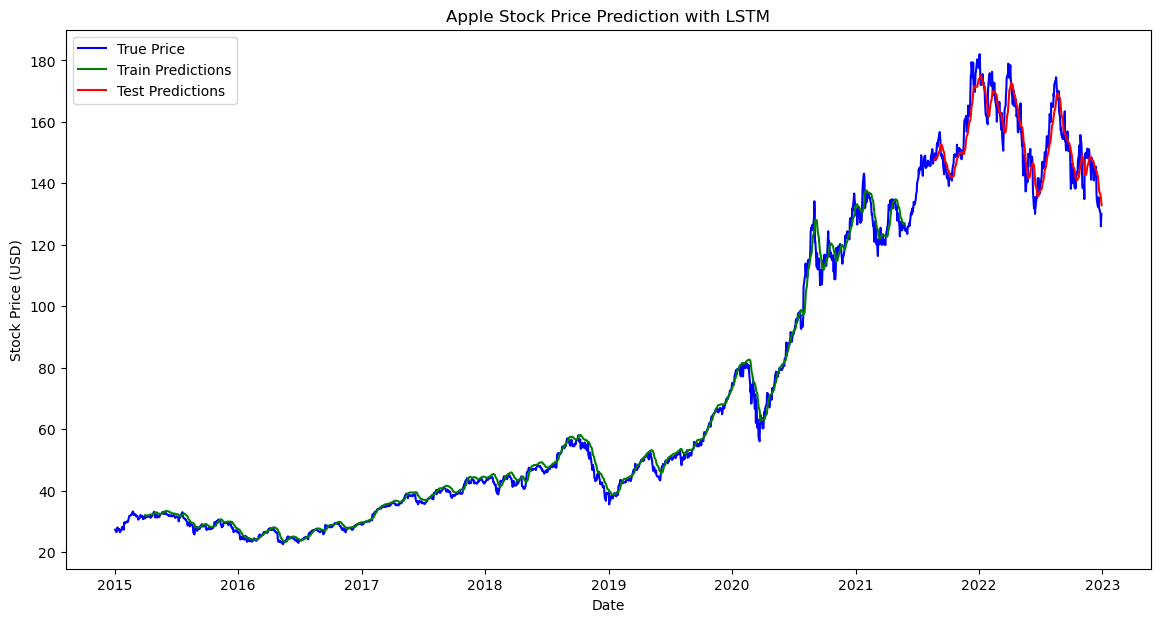

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='True Price', color='blue')
plt.plot(data.index, train_predictions_plot, label='Train Predictions', color='green')
plt.plot(data.index, test_predictions_plot, label='Test Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Apple Stock Price Prediction with LSTM')
plt.legend()
plt.show()

In [60]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

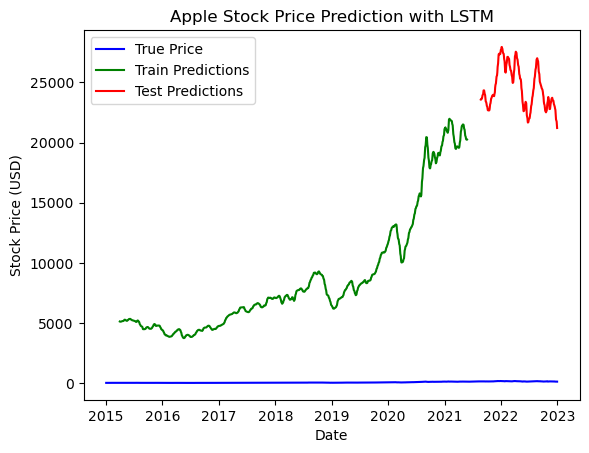

In [62]:
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='True Price', color='blue')
plt.plot(data.index[60:train_data_len], scaler.inverse_transform(train_pred), label='Train Predictions', color='green')
plt.plot(data.index[train_data_len + 60:], scaler.inverse_transform(test_pred), label='Test Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Apple Stock Price Prediction with LSTM')
plt.legend()
plt.show()